# Notes to discuss with prof

1. since the data is very skewed it won't make sense for us to do cross validation where we randomly choose which data to use for training and which data to use for testing, because if do that after duplicating the low count data then most of the data in testing set will be in training set
2. what is the difference between training the network after performing oversampling and just training the network on the same data but more epochs
3. can we train the model with just 64 examples but keep the positive class data same and randomly choose rest of 32 negative class data?

In [1]:
from mygrad import Layer
from mygrad import Value

In [2]:
import pickle
with open('data.pckl', 'rb') as file:
    data = pickle.load(file)

In [3]:
from sklearn.utils import shuffle
data = shuffle(data)
# data = data[:100]

In [4]:
# get the data

X = [list(number) for number in data['number']]
Y = [label for label in data['label']]

len(X)

1024

In [5]:
for ix, row in enumerate(X):
    X[ix] = [Value(float(item)) for item in row]


In [6]:
Xtrain, Xtest, Ytrain, Ytest = X[:int(len(X)*0.8)], X[int(len(X)*0.8):], Y[:int(len(X)*0.8)], Y[int(len(X)*0.8):]

In [7]:
list(zip([1, 1, 1], [2, 2, 2, 2, 2, 2]))

[(1, 2), (1, 2), (1, 2)]

In [8]:
# nn.init.zeros_(hiddenLayer.weight)

# s1 = Sigmoid()
hiddenLayer1 = Layer(10, 2, activation='reLu')

outputLayer = Layer(2, 1, activation='sigmoid')
# nn.init.zeros_(outputLayer.weight)

# s2 = Sigmoid()

# parameters = [list(hiddenLayer.parameters())[0]]
# parameters.append(list(outputLayer.parameters())[0])
parameters =  outputLayer.parameters() + hiddenLayer1.parameters()
print(parameters)

[Value(data=-0.667169932039597), Value(data=-0.5370340536850897), Value(data=-0.9463122786916407), Value(data=0.8994216695295372), Value(data=-0.830400127506524), Value(data=0.40634320291206794), Value(data=-0.3385915409707341), Value(data=-0.17640307639395725), Value(data=0.7949196394654867), Value(data=-0.4729086702363954), Value(data=-0.596186597303136), Value(data=0.8962503818514649), Value(data=0.8298226628259127), Value(data=0.13039330074376432), Value(data=0.26278738355131415), Value(data=0.024430122777827634), Value(data=-0.9771560014797915), Value(data=-0.9522284048091654), Value(data=0.1364747759328968), Value(data=0.29314252943216235), Value(data=-0.6274024302635148), Value(data=-0.36997082165881445), Value(data=-0.7125167572163189), Value(data=0.42177780603352), Value(data=-0.995716138892955)]


In [9]:
def predict(x):
    x = hiddenLayer1(x)
    # out2 = hiddenLayer2(x[5:])
    # out = [out1] + [out2]
    # x = s1(x)
    # print(x)
    
    final = outputLayer(x)
    # x = s2(x)
    return final

In [10]:
from sklearn.metrics import accuracy_score
def getAccuracy(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    print(predicted)
    return accuracy_score(predicted, Y)


In [11]:
parameters =  outputLayer.parameters() + hiddenLayer1.parameters()


In [12]:
losss = []

In [14]:
lr = 1
epochs = 1000
for _ in range(epochs):
    Y_pred = [predict(x) for x in Xtrain]
    # print(Y_pred)
    loss = Value(0)
    for i in range(len(Ytrain)):
        if Ytrain[i] == 1:
            # print('ssd')
            loss -= Y_pred[i].log()
        else:
            # print('sds')
            loss -= (Value(1) - Y_pred[i]).log()
    loss = loss/len(X)
    loss.backward()

    for p in parameters:
        p.data -= lr*p.grad

    for p in parameters:
        p.grad = 0
    losss.append(loss.data)
    print(loss, _)
print( 'test', getAccuracy(Xtest, Ytest),'train', getAccuracy(Xtrain, Ytrain))

Value(data=0.4089331320980306) 0
Value(data=0.4087381077811604) 1
Value(data=0.408542845382166) 2
Value(data=0.40834727964890133) 3
Value(data=0.40815207562498634) 4
Value(data=0.40796498799042374) 5
Value(data=0.40777793281148367) 6
Value(data=0.40759075687408247) 7
Value(data=0.40740336871175903) 8
Value(data=0.40721705390314933) 9
Value(data=0.4070364989962983) 10
Value(data=0.4068644996038396) 11
Value(data=0.406692949806643) 12
Value(data=0.4065215456875335) 13
Value(data=0.4063501122382005) 14
Value(data=0.4061785466528999) 15
Value(data=0.40600851363476737) 16
Value(data=0.4058402319659642) 17
Value(data=0.40567165856681636) 18
Value(data=0.40550278613719254) 19
Value(data=0.4053349822022637) 20
Value(data=0.4051659813807389) 21
Value(data=0.4049982117369541) 22
Value(data=0.4048297251563856) 23
Value(data=0.40466119233710535) 24
Value(data=0.40449287100058334) 25
Value(data=0.40432464585430405) 26
Value(data=0.40415645164243447) 27
Value(data=0.403988501384936) 28
Value(data=0.

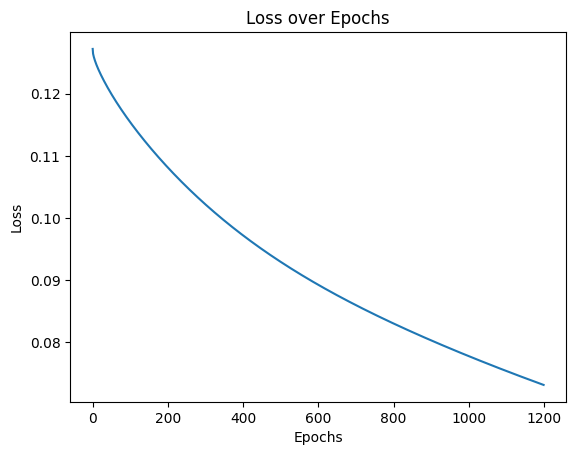

In [23]:
import matplotlib.pyplot as plt

plt.plot(losss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()


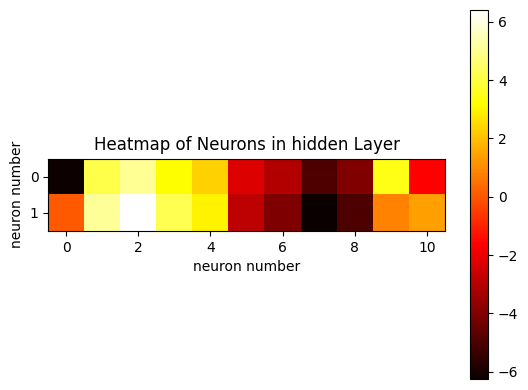

Text(0, 0.5, 'neuron number')

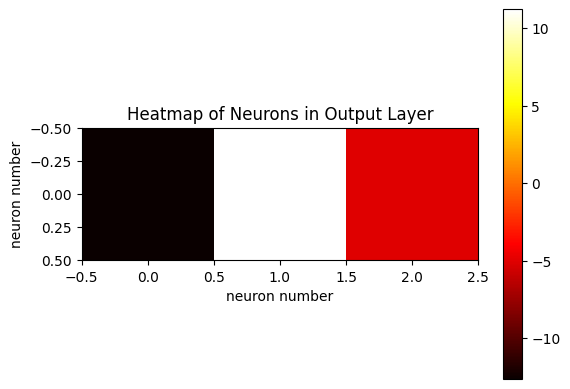

In [24]:
neuron1weightsbias = [v.data for v in hiddenLayer1.neurons[0].w] + [hiddenLayer1.neurons[0].b.data]
neuron2weightsbias = [v.data for v in hiddenLayer1.neurons[1].w] + [hiddenLayer1.neurons[1].b.data]
outputneuronweightsbias = [v.data for v in outputLayer.neurons[0].w] + [outputLayer.neurons[0].b.data]
import matplotlib.pyplot as plt

plt.imshow([neuron1weightsbias, neuron2weightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in hidden Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')
plt.show()

plt.imshow([outputneuronweightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in Output Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')


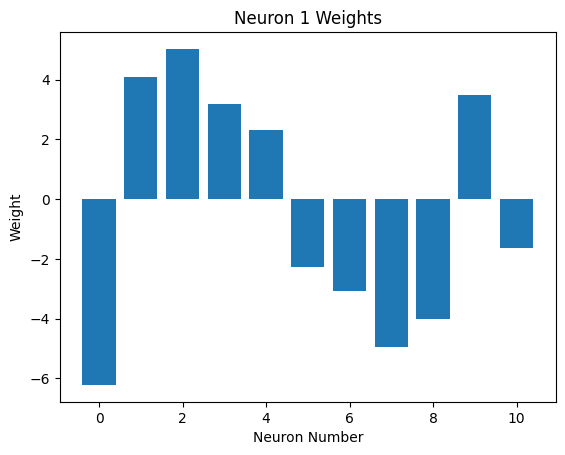

In [25]:
plt.bar(range(len(neuron1weightsbias)), neuron1weightsbias)
plt.xlabel('Neuron Number')
plt.ylabel('Weight')
plt.title('Neuron 1 Weights')
plt.show()


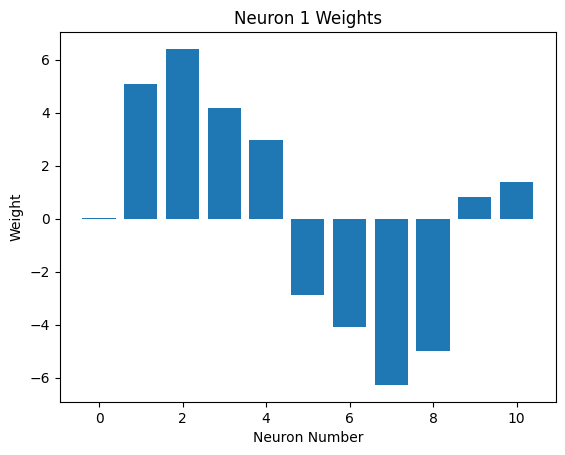

In [26]:
plt.bar(range(len(neuron2weightsbias)), neuron2weightsbias)
plt.xlabel('Neuron Number')
plt.ylabel('Weight')
plt.title('Neuron 1 Weights')
plt.show()


In [38]:
import pickle as pkl 

with open('parameters/neuron1weightsbias.pckl', 'wb') as file:
    pkl.dump(neuron1weightsbias, file)
with open('parameters/neuron2weightsbias.pckl', 'wb') as file:
    pkl.dump(neuron2weightsbias, file)
with open('parameters/outputneuronweightsbias.pckl', 'wb') as file:
    pkl.dump(outputneuronweightsbias, file)

In [10]:
# Load model
def loadModel():
    neuron1weightsbias, neuron2weightsbias, outputneuronweightsbias = [], [], []
    with open('parameters/neuron1weightsbias.pckl', 'rb') as file:
        neuron1weightsbias = pickle.load(file)
    with open('parameters/neuron2weightsbias.pckl', 'rb') as file:
        neuron2weightsbias = pickle.load(file)
    with open('parameters/outputneuronweightsbias.pckl', 'rb') as file:
        outputneuronweightsbias = pickle.load(file)
    hiddenLayer1_ = Layer(10, 2)
    outputLayer_ = Layer(2, 1)

    hiddenLayer1_.neurons[0].w = [Value(i) for i in neuron1weightsbias[:-1]]
    hiddenLayer1_.neurons[0].b = Value(neuron1weightsbias[-1])

    hiddenLayer1_.neurons[1].w = [Value(i) for i in neuron2weightsbias[:-1]]
    hiddenLayer1_.neurons[1].b = Value(neuron2weightsbias[-1])

    outputLayer_.neurons[0].w = [Value(i) for i in outputneuronweightsbias[:-1]]
    outputLayer_.neurons[0].b = Value(outputneuronweightsbias[-1])
    return hiddenLayer1_, outputLayer_, neuron1weightsbias, neuron2weightsbias, outputneuronweightsbias

In [11]:
hiddenLayer1, outputLayer,  neuron1weightsbias, neuron2weightsbias, outputneuronweightsbias= loadModel()

In [12]:
getAccuracy(Xtest, Ytest)

NameError: name 'getAccuracy' is not defined

In [42]:
[round(i) for i in neuron1weightsbias]

[-6, 4, 5, 3, 2, -2, -3, -5, -4, 3, -2]

In [43]:
[round(i) for i in neuron2weightsbias]

[0, 5, 6, 4, 3, -3, -4, -6, -5, 1, 1]

In [21]:
[round(i) for i in outputneuronweightsbias]

[-10, 9, -4]

In [34]:
hiddenLayer1.neurons[0]([Value(i) for i in [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]])

Value(data=0.8043751235099056)

In [44]:
predict([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Value(data=0.9815563620863182)